# Data Wrangling 

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Rownumber: Unique ID for every row  
CustomerID: Unique ID for every client  
Surname: Client's surname  
CreditScore: Client's credit score  
Geography: Country of client's origin  
Gender: Client's gender  
Age: Client's age  
Tenure: Number of years for which the client has been with the bank  
Balance: Client's balance on account  
NumOfProducts: Number of client's products  
HasCrCard: Flag whether client has credit card or not  
IsActiveMember: Flag whether client is active member of bank or not  
EstimatedSalary: Client's annual estimated salary in euros  
Exited: Target variable, flag, whether client left the bank or not


In [2]:
# Read in file
data = pd.read_csv('Churn_Modelling.csv')
data.shape

(10000, 14)

In [3]:
data.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can see that the data is perfectly clean with no missing data at all. We may still need pay attetion to abnormal value. It should be noted that CustomerId is not data type of int. 

In [5]:
# Convert CustomerId to String Data Type
data['CustomerId'] = data['CustomerId'].astype(str)

In [6]:
data.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
data[data.duplicated(subset = ['Surname','Gender','Age'], keep = False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
36,37,15788448,Watson,490,Spain,Male,31,3,145260.23,1,0,1,114066.77,0
39,40,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,0,1,178074.04,0
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,9971,15587133,Thompson,518,France,Male,42,7,151027.05,2,1,0,119377.36,0
9976,9977,15656062,Azikiwe,637,France,Female,33,7,103377.81,1,1,0,84419.78,0
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,0
9983,9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0


In [9]:
duplicates_table = (data['Surname'] + ',' + data['Gender'] + ',' + data['Age'].astype(str)).value_counts()

In [10]:
duplicates_table[duplicates_table > 1]

Tien,Male,34          4
Kennedy,Female,34     3
Moore,Male,41         3
Genovese,Male,32      3
Brown,Female,40       3
                     ..
McIntyre,Male,34      2
Davide,Male,31        2
Martin,Male,30        2
Findlay,Female,40     2
McGregor,Female,40    2
Length: 547, dtype: int64

We can obeserve that there are a toal of 1143 duplicated values in columns [Surname, Gender, Age]. It is probably because that some customers opened different account in different country or they may close the old account and open a new accoount. Further observation is needed to make a conclusion. 

In [11]:
data.select_dtypes('object')

,CustomerId,Surname,Geography,Gender
0,15634602,Hargrave,France,Female
1,15647311,Hill,Spain,Female
2,15619304,Onio,France,Female
3,15701354,Boni,France,Female
4,15737888,Mitchell,Spain,Female
...,...,...,...,...
9995,15606229,Obijiaku,France,Male
9996,15569892,Johnstone,France,Male
9997,15584532,Liu,France,Female
9998,15682355,Sabbatini,Germany,Male


In [12]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

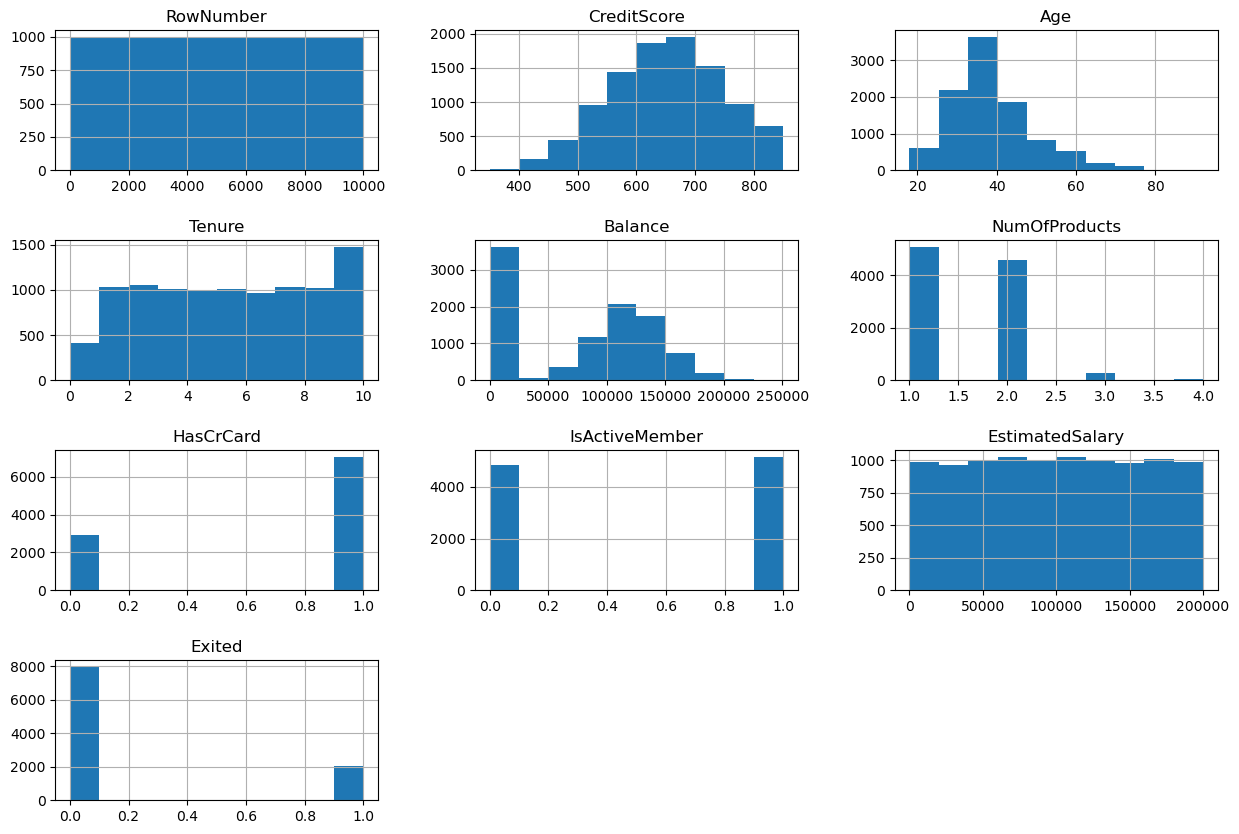

In [14]:
data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5)

From above viusualization, we can see that RowNumber is uniformly distributed and contains no information. Therefore, we can consider of removing column RowNumber. It should also be noticed that there are a large number of observations with Balance equal to 0. We may need to pay extra attention on the rows with Balance equal to 0. EstimatedSalary is also uniformly distributed. 

In [15]:
data[data['Balance'] == 0].describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3617.000000,3617.000000,3617.000000,3617.000000,3617.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,5032.100083,649.452861,38.434891,5.071330,0.0,1.784628,0.716616,0.517832,98983.559549,0.138236
std,2875.309344,96.158798,10.492002,2.860781,0.0,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.000000,350.000000,18.000000,0.000000,0.0,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2561.000000,583.000000,31.000000,3.000000,0.0,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,5067.000000,651.000000,37.000000,5.000000,0.0,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,7528.000000,717.000000,43.000000,7.000000,0.0,2.000000,1.000000,1.000000,148330.970000,0.000000
max,9998.000000,850.000000,88.000000,10.000000,0.0,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
data[data['Balance'] != 0].describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,4982.593451,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,2893.512280,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,2.000000,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2461.500000,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,4966.000000,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,7482.500000,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,10000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


It seems that the churn rate of those customers with 0 Balance is lower compared with the churn rate of all customers, which is definitely not expected. It should be more reasonable that the customers with 0 Balance are more likely to leave the bank. We should always keep an eye on this phenomenon.

In [17]:
# Remove Column RowNumber
data = data.drop(columns = ['RowNumber'])
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
